In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data= pd.read_excel("../Data/default of credit card clients.xls",skiprows=1,index_col=0)

In [3]:
Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [5]:
Data.shape

(30000, 24)

##### Description Data :
- Dans ce jeu de données  on a 30000clients et 24 variables quantitatives dont  11 variables qualitatives encodées et
13 variables quantitatives:
    - Limit_Ball : qui est notre cible
    - BILL_AMT1 ,BILL_AMT2 ,BILL_AMT3 ,BILL_AMT4,BILL_AMT5, BILL_AMT6,PAY_AMT1,PAY_AMT2,        PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6

                                       
                   
                     
    

In [6]:
Data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

- on n'a pas des valeurs manquantes dans ce jeu de données

#### Encodage des variables qualitatives :

In [7]:
 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

LabelEBA = LabelEncoder()
OneHE = OneHotEncoder()

In [8]:
Data["SEX"].unique()

array([2, 1], dtype=int64)

In [9]:
Data["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [10]:
Data["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [11]:
Data["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
Data["PAY_2"].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [13]:
Data["PAY_0"].nunique()

11

In [14]:
Data["PAY_2"].nunique()

11

In [15]:
Data["PAY_3"].nunique()

11

- Les modalités des variables dans ce jeu de données sont supérieures aux modalités de la description, on va donc éliminer 
les modalités en plus vu qu'elles ne sont pas fréquentes dans le dataset

In [16]:
from collections import Counter
Counter(Data["EDUCATION"]).most_common()

[(2, 14030), (1, 10585), (3, 4917), (5, 280), (4, 123), (6, 51), (0, 14)]

In [17]:
Data = Data.drop(Data[(Data.EDUCATION == 0) | (Data.EDUCATION == 6) | (Data.EDUCATION == 5)].index)
Counter(Data["EDUCATION"]).most_common()

[(2, 14030), (1, 10585), (3, 4917), (4, 123)]

In [18]:
Data.shape

(29655, 24)

In [19]:
Counter(Data["MARRIAGE"]).most_common()

[(2, 15806), (1, 13477), (3, 318), (0, 54)]

In [20]:
Data = Data.drop(Data[(Data.MARRIAGE == 0)].index)
Counter(Data["MARRIAGE"]).most_common()

[(2, 15806), (1, 13477), (3, 318)]

In [21]:
Counter(Data["MARRIAGE"]).most_common()

[(2, 15806), (1, 13477), (3, 318)]

In [22]:
Counter(Data["PAY_0"]).most_common()

[(0, 14499),
 (-1, 5633),
 (1, 3662),
 (-2, 2708),
 (2, 2640),
 (3, 320),
 (4, 76),
 (5, 24),
 (8, 19),
 (6, 11),
 (7, 9)]

In [23]:
Data.shape

(29601, 24)

In [24]:
cible = Data.iloc[:,-1]

In [25]:
Counter(cible).most_common()

[(0, 22996), (1, 6605)]

In [26]:
cible.shape

(29601,)

In [27]:
Data.drop(columns=["default payment next month"],inplace=True)

In [28]:
Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


#### Encodage avec OneHotEncoder:


##### Education :

In [29]:
from sklearn.preprocessing import OneHotEncoder
OneHE = OneHotEncoder()
matriceEducation = OneHE.fit_transform(Data["EDUCATION"].values.reshape(-1,1)).toarray()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [30]:
Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [31]:
type(matriceEducation)

numpy.ndarray

In [32]:
matriceEducation

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [33]:
pd.concat( [pd.DataFrame(matriceEducation,index=Data.index) ,Data["EDUCATION"]] ,axis=1);

In [34]:
df = pd.DataFrame(matriceEducation,columns=["graduate school","university","high school","other_education"], index=Data.index)

In [35]:
df.drop(columns=["graduate school"],inplace=True)


##### Mariage

In [36]:
matriceMariage = OneHE.fit_transform(Data["MARRIAGE"].values.reshape(-1,1)).toarray()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [37]:
pd.concat( [pd.DataFrame(matriceMariage,index=Data.index) ,Data["MARRIAGE"]] ,axis=1);

In [38]:
df_mariage = pd.DataFrame(matriceMariage,columns=["married","single","other_mariage"], index=Data.index)

In [39]:
df_mariage.drop(columns=["married"],inplace=True)

##### PAY_0 :

In [40]:
from sklearn.preprocessing import OneHotEncoder
OneHE_auto = OneHotEncoder(categories='auto')

In [41]:
matrice_pay0 = OneHE_auto.fit_transform(Data["PAY_0"].values.reshape(-1,1)).toarray()

In [42]:
Data["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [43]:
pd.concat( [pd.DataFrame(matrice_pay0,index=Data.index) ,Data["PAY_0"]] ,axis=1) ;

In [44]:
df_pay_0 = pd.DataFrame(matrice_pay0,columns=["PAY_00","PAY_01","PAY_02","PAY_03","PAY_04","PAY_05","PAY_06","PAY_07","PAY_08","PAY_09","PAY_10"], index=Data.index)

In [45]:
df_pay_0.drop(columns=["PAY_00"],inplace=True)

##### PAY_2 :

In [46]:
matrice_pay2 = OneHE_auto.fit_transform(Data["PAY_2"].values.reshape(-1,1)).toarray()

In [47]:
Data["PAY_2"].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [48]:
pd.concat( [pd.DataFrame(matrice_pay2,index=Data.index) ,Data["PAY_2"]] ,axis=1) ;

In [49]:
df_pay_2 = pd.DataFrame(matrice_pay2,columns=["PAY_2_0","PAY_2_1","PAY_2_2","PAY_2_3","PAY_2_4","PAY_2_5","PAY_2_6","PAY_2_7","PAY_2_8","PAY_2_9","PAY_2_10"], index=Data.index)

In [50]:
df_pay_2.drop(columns=["PAY_2_0"],inplace=True)

##### PAY_3 :

In [51]:
matrice_pay3 = OneHE_auto.fit_transform(Data["PAY_3"].values.reshape(-1,1)).toarray()

In [52]:
Data["PAY_3"].unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

In [53]:
pd.concat( [pd.DataFrame(matrice_pay3,index=Data.index) ,Data["PAY_3"]] ,axis=1)

,0,1,2,3,4,5,6,7,8,9,10,PAY_3
ID,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [54]:
df_pay_3 = pd.DataFrame(matrice_pay3,columns=["PAY_3_0","PAY_3_1","PAY_3_2","PAY_3_3","PAY_3_4","PAY_3_5","PAY_3_6","PAY_3_7","PAY_3_8","PAY_3_9","PAY_3_10"], index=Data.index)

In [55]:
df_pay_3.drop(columns=["PAY_3_0"],inplace=True)

##### PAY_4 :

In [56]:
matrice_pay4 = OneHE_auto.fit_transform(Data["PAY_4"].values.reshape(-1,1)).toarray()

In [57]:
pd.concat( [pd.DataFrame(matrice_pay4,index=Data.index) ,Data["PAY_4"]] ,axis=1) ;

In [58]:
df_pay_4 = pd.DataFrame(matrice_pay4,columns=["PAY_4_0","PAY_4_1","PAY_4_2","PAY_4_3","PAY_4_4","PAY_4_5","PAY_4_6","PAY_4_7","PAY_4_8","PAY_4_9","PAY_4_10"], index=Data.index)

In [59]:
df_pay_4.drop(columns=["PAY_4_0"],inplace=True)

##### PAY_5 :

In [60]:
matrice_pay5 = OneHE_auto.fit_transform(Data["PAY_5"].values.reshape(-1,1)).toarray()

In [61]:
pd.concat( [pd.DataFrame(matrice_pay5,index=Data.index) ,Data["PAY_5"]] ,axis=1) ;

In [62]:
df_pay_5 = pd.DataFrame(matrice_pay5,columns=["PAY_5_0","PAY_5_1","PAY_5_2","PAY_5_3","PAY_5_4","PAY_5_5","PAY_5_6","PAY_5_7","PAY_5_8","PAY_5_9"], index=Data.index)

In [63]:
df_pay_5.drop(columns=["PAY_5_0"],inplace=True)

##### PAY_6:

In [64]:
matrice_pay6 = OneHE_auto.fit_transform(Data["PAY_6"].values.reshape(-1,1)).toarray()

In [65]:
pd.concat( [pd.DataFrame(matrice_pay6,index=Data.index) ,Data["PAY_6"]] ,axis=1) ;

In [66]:
df_pay_6 = pd.DataFrame(matrice_pay6,columns=["PAY_6_0","PAY_6_1","PAY_6_2","PAY_6_3","PAY_6_4","PAY_6_5","PAY_6_6","PAY_6_7","PAY_6_8","PAY_6_9"], index=Data.index)

In [67]:
df_pay_6.drop(columns=["PAY_6_0"],inplace=True)

In [68]:
data_final = pd.concat( [df,df_mariage,df_pay_0,df_pay_2,df_pay_3,df_pay_4,df_pay_5,df_pay_6,Data], axis=1)

In [69]:
data_final.shape

(29601, 86)

In [70]:
data_final.drop(columns=["EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"],inplace=True)

In [71]:
data_final.columns

Index(['university', 'high school', 'other_education', 'single',
       'other_mariage', 'PAY_01', 'PAY_02', 'PAY_03', 'PAY_04', 'PAY_05',
       'PAY_06', 'PAY_07', 'PAY_08', 'PAY_09', 'PAY_10', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8',
       'PAY_2_9', 'PAY_2_10', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_3_9', 'PAY_3_10',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_4_9', 'PAY_4_10', 'PAY_5_1', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_5_9', 'PAY_6_1', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'PAY_6_9', 'LIMIT_BAL', 'SEX', 'AGE',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='objec

In [72]:
data_final.shape

(29601, 78)

In [73]:
data_final.head()

,university,high school,other_education,single,other_mariage,PAY_01,PAY_02,PAY_03,PAY_04,PAY_05,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,689,0,0,0,0,689,0,0,0,0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


#### Rescaling avec Standardscaler :

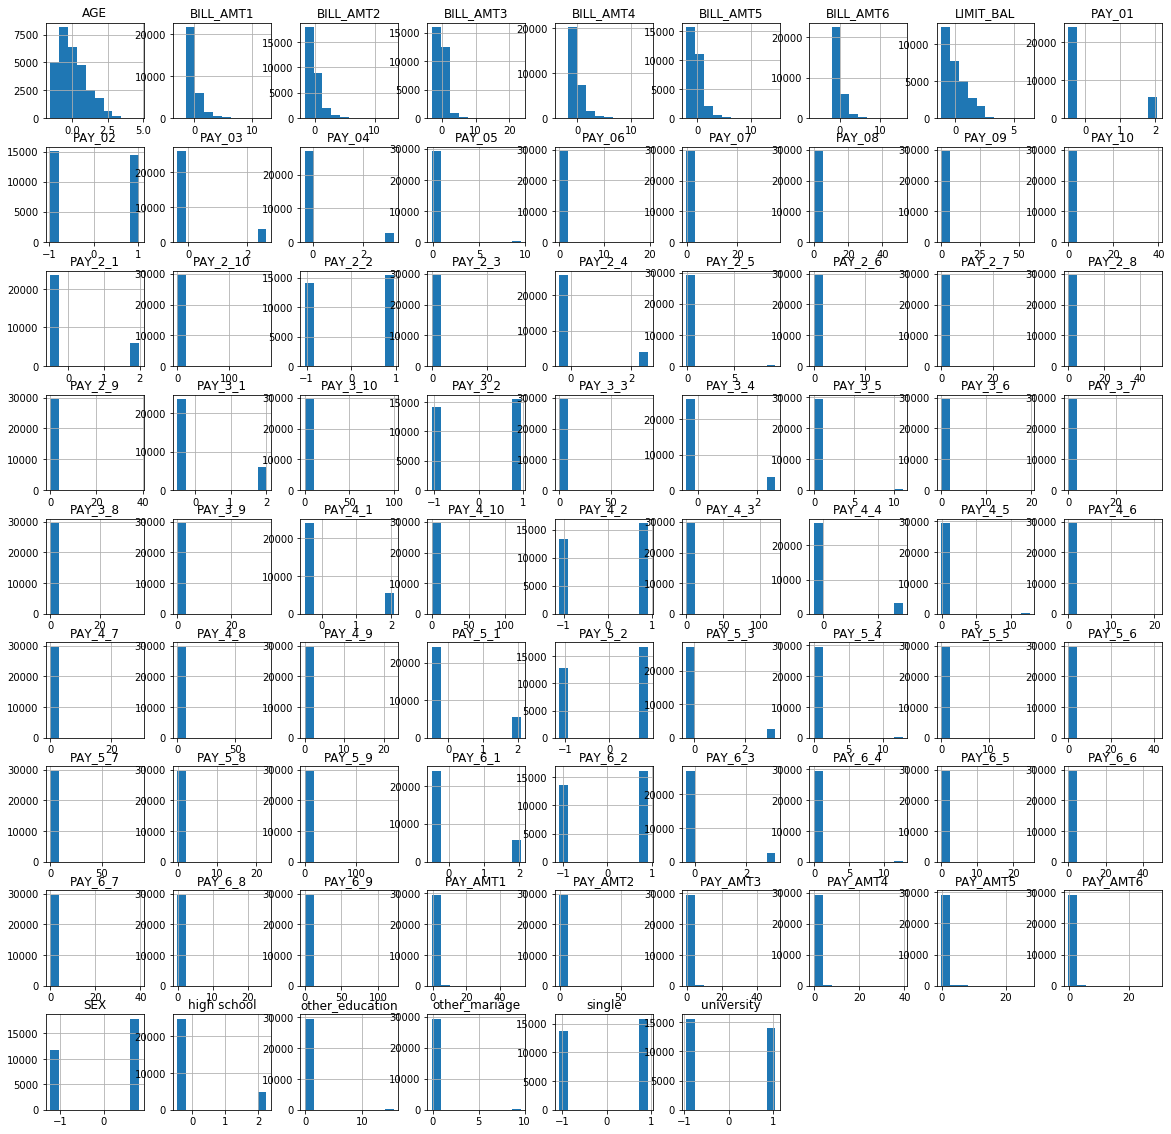

In [74]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
DATA=data_final
data_final=pd.DataFrame(StandardScaler.fit_transform(data_final.values),columns=data_final.columns)
data_final.hist(figsize=(20,20));

In [75]:
Data_quanti = data_final[["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]


In [76]:
data_final.head()

,university,high school,other_education,single,other_mariage,PAY_01,PAY_02,PAY_03,PAY_04,PAY_05,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,-0.484790,-0.979832,-0.375736,3.19570,-0.10454,...,-0.667135,-0.671740,-0.662877,-0.652876,-0.340993,-0.225468,-0.295690,-0.307347,-0.314553,-0.293444
1,1.053916,-0.443919,-0.064596,0.934222,-0.104209,2.062747,-0.979832,-0.375736,-0.31292,-0.10454,...,-0.638302,-0.620771,-0.605957,-0.598087,-0.340993,-0.211998,-0.238809,-0.243696,-0.314553,-0.180174
2,1.053916,-0.443919,-0.064596,0.934222,-0.104209,-0.484790,1.020583,-0.375736,-0.31292,-0.10454,...,-0.480945,-0.448499,-0.416610,-0.391631,-0.249370,-0.190343,-0.238809,-0.243696,-0.248953,-0.010269
3,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,-0.484790,1.020583,-0.375736,-0.31292,-0.10454,...,0.035991,-0.230680,-0.185780,-0.156445,-0.220278,-0.167864,-0.227433,-0.237331,-0.244427,-0.236809
4,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,2.062747,-0.979832,-0.375736,-0.31292,-0.10454,...,-0.158677,-0.345548,-0.347449,-0.331449,-0.220278,1.333383,0.273118,0.265508,-0.269355,-0.254989


# ACP
##### Des variables Quantitatives:

In [96]:
Data_quanti = data_final[["AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]

In [97]:
Data_quanti.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.244325,-0.641203,-0.646339,-0.667135,-0.671740,-0.662877,-0.652876,-0.340993,-0.225468,-0.295690,-0.307347,-0.314553,-0.293444
1,-1.027242,-0.657981,-0.665755,-0.638302,-0.620771,-0.605957,-0.598087,-0.340993,-0.211998,-0.238809,-0.243696,-0.314553,-0.180174
2,-0.158912,-0.296016,-0.492299,-0.480945,-0.448499,-0.416610,-0.391631,-0.249370,-0.190343,-0.238809,-0.243696,-0.248953,-0.010269
3,0.166712,-0.054075,-0.009999,0.035991,-0.230680,-0.185780,-0.156445,-0.220278,-0.167864,-0.227433,-0.237331,-0.244427,-0.236809
4,2.337536,-0.577089,-0.610131,-0.158677,-0.345548,-0.347449,-0.331449,-0.220278,1.333383,0.273118,0.265508,-0.269355,-0.254989


In [98]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = decomposition.PCA()
Data_Pca = pca.fit_transform(Data_quanti)
pca.explained_variance_ratio_


array([0.44500556, 0.12568742, 0.07660467, 0.06985508, 0.06795548,
       0.06696477, 0.05978114, 0.05580133, 0.02009995, 0.00540929,
       0.00313291, 0.0019115 , 0.00179091])

In [99]:
pca.explained_variance_ratio_.sum()

1.0

In [100]:
print(pca.n_components_)

13


In [101]:
var = pca.explained_variance_
var

array([5.78526771, 1.6339917 , 0.99589431, 0.90814671, 0.88345108,
       0.87057139, 0.77718107, 0.72544182, 0.26130816, 0.07032315,
       0.04072917, 0.02485037, 0.02328256])

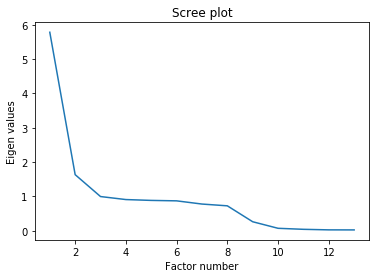

In [102]:
p = Data_quanti.shape[1]

plt.plot(np.arange(1,p+1),var)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

- il ya une cassure au niveau 2 donc selon le critére de coud on va retenir 2 dimensions


In [103]:
print(pd.DataFrame({'Val.Propre':var}))

    Val.Propre
0     5.785268
1     1.633992
2     0.995894
3     0.908147
4     0.883451
5     0.870571
6     0.777181
7     0.725442
8     0.261308
9     0.070323
10    0.040729
11    0.024850
12    0.023283


- Selon le critére de kaiser on devrait retenir les 2 premieres composantes( valeur propre > 1)

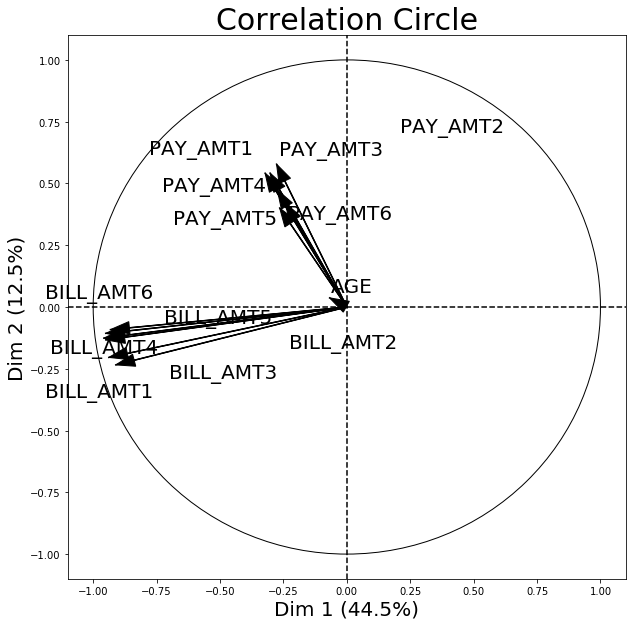

In [89]:
from mlxtend.plotting import plot_pca_correlation_graph
feature_names=['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
figure, correlation_matrix = plot_pca_correlation_graph(Data_quanti, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)



In [90]:
correlation_matrix

,Dim 1,Dim 2
AGE,-0.067932,0.037040
BILL_AMT1,-0.911051,-0.234243
BILL_AMT2,-0.938516,-0.204059
BILL_AMT3,-0.950568,-0.132876
BILL_AMT4,-0.958109,-0.125972
BILL_AMT5,-0.950680,-0.106669
BILL_AMT6,-0.931947,-0.091554
PAY_AMT1,-0.322097,0.541580
PAY_AMT2,-0.276978,0.578006
PAY_AMT3,-0.302618,0.541961


#### Interpreation :
- On que  remarque que les variables BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4,BILL_AMT5, BILL_AMT6  sont fortement corrélées negativement avec la première dimension
- Et les variables PAY_AMT1 ,PAY_AMT2,PAY_AMT3 sont corrélées négativement avec la deuxieme composante

#### Conclusion :
- Pour la suite , on ne va retenir que les variables qui sont fortement corrélées avec les 2 axes car elles contiennent le plus d'informations dans ce jeux de données 

In [104]:
principalDf = pd.DataFrame(data = Data_Pca[:,0:2]
             , columns = ['principal component 1', 
                          'principal component 2'])

In [105]:
principalDf.head()

,principal component 1,principal component 2
0,-1.784432,-0.258536
1,-1.689450,-0.171719
2,-1.135408,-0.179466
3,-0.386601,-0.446067
4,-0.723406,0.929745


## Algorithme Non supervisé: Segmetation
### KMEANS: 

In [91]:
Data_quanti.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.244325,-0.641203,-0.646339,-0.667135,-0.671740,-0.662877,-0.652876,-0.340993,-0.225468,-0.295690,-0.307347,-0.314553,-0.293444
1,-1.027242,-0.657981,-0.665755,-0.638302,-0.620771,-0.605957,-0.598087,-0.340993,-0.211998,-0.238809,-0.243696,-0.314553,-0.180174
2,-0.158912,-0.296016,-0.492299,-0.480945,-0.448499,-0.416610,-0.391631,-0.249370,-0.190343,-0.238809,-0.243696,-0.248953,-0.010269
3,0.166712,-0.054075,-0.009999,0.035991,-0.230680,-0.185780,-0.156445,-0.220278,-0.167864,-0.227433,-0.237331,-0.244427,-0.236809
4,2.337536,-0.577089,-0.610131,-0.158677,-0.345548,-0.347449,-0.331449,-0.220278,1.333383,0.273118,0.265508,-0.269355,-0.254989


In [92]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier



res=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Data_quanti.iloc[:,2:4])
    res.append(kmeans.inertia_)

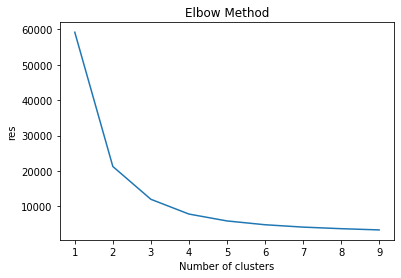

In [93]:
plt.plot(range(1, 10), res)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("res")
plt.show()

- En utilisant la  méthode "Elbow"==>Le nombre de cluster est égal  à 2

In [94]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(Data_quanti)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
from sklearn import metrics
metrics.adjusted_rand_score(Data.iloc[:,0],kmeans.labels_)

0.013246176070299263

### Interprétation:
- le score du tableau croisé est trés faible, Donc On ne va pas  pouvoir l'utiliser pour  interpréter la variable Cible "LIMIT_BAL" avec les clusters
- ==> on va se contenter de faire le profiling des variables synthétiques

In [174]:
DATA.head()

,university,high school,other_education,single,other_mariage,PAY_01,PAY_02,PAY_03,PAY_04,PAY_05,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,689,0,0,0,0,689,0,0,0,0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


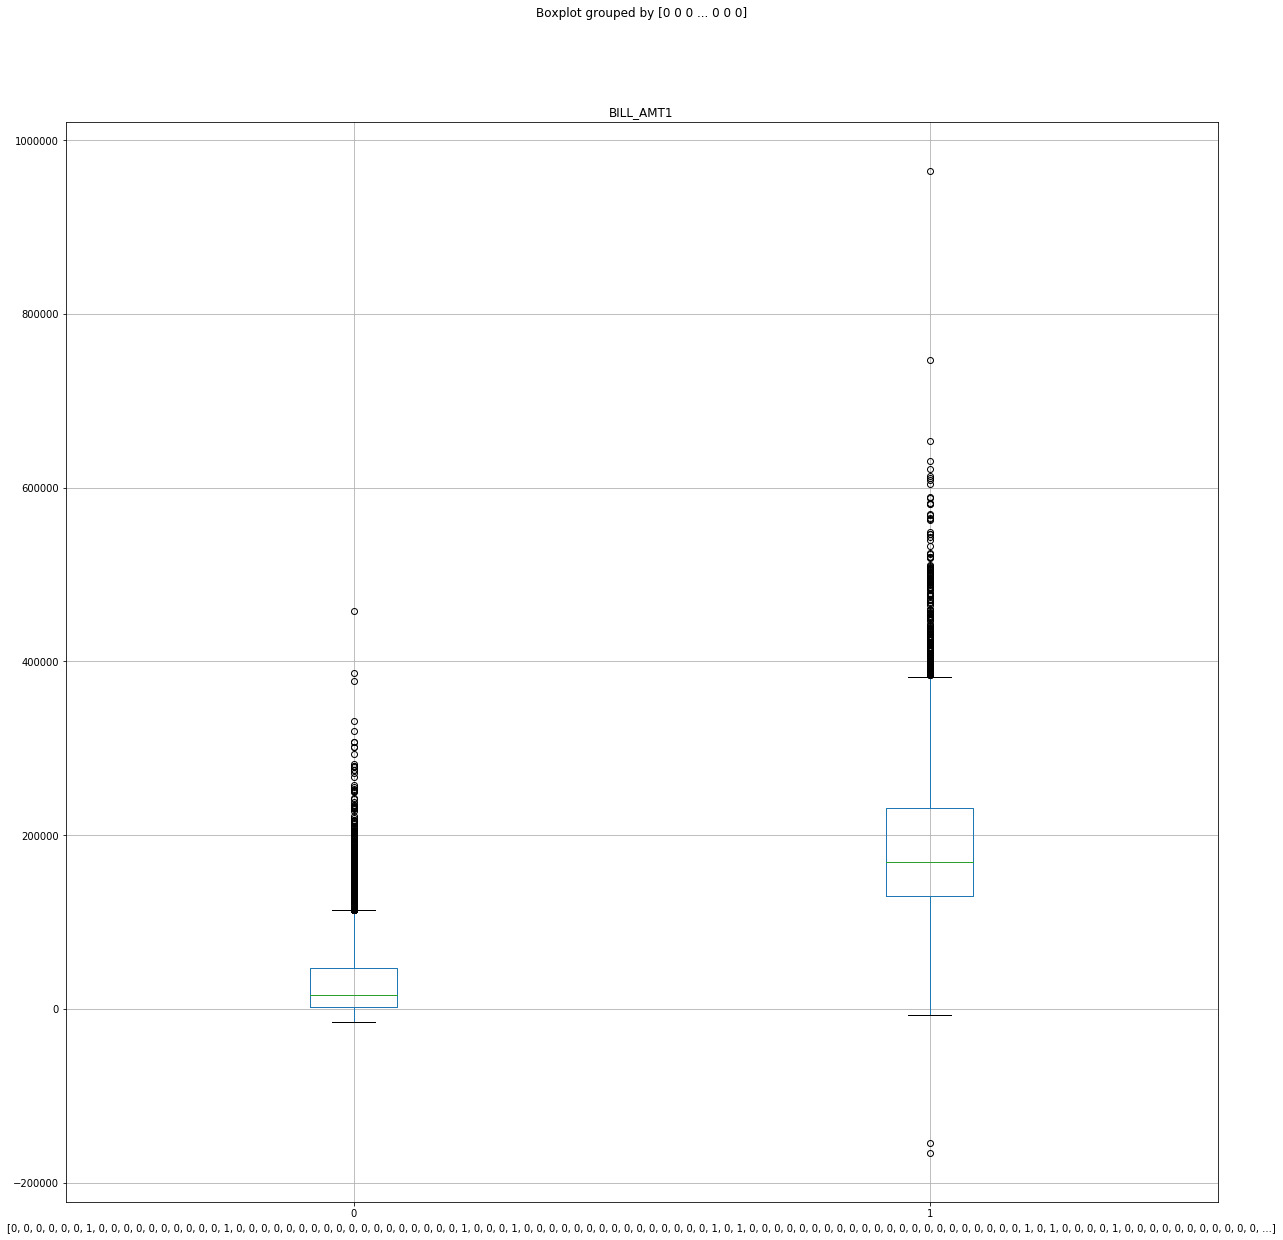

In [175]:
DATA.boxplot(column=['BILL_AMT1'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "BILL_AMT1" est  significative , car dans le cluster0 sa valeur est entre 1et 50000 et dans le cluster1 , sa valeur est entre 100000 et 250000

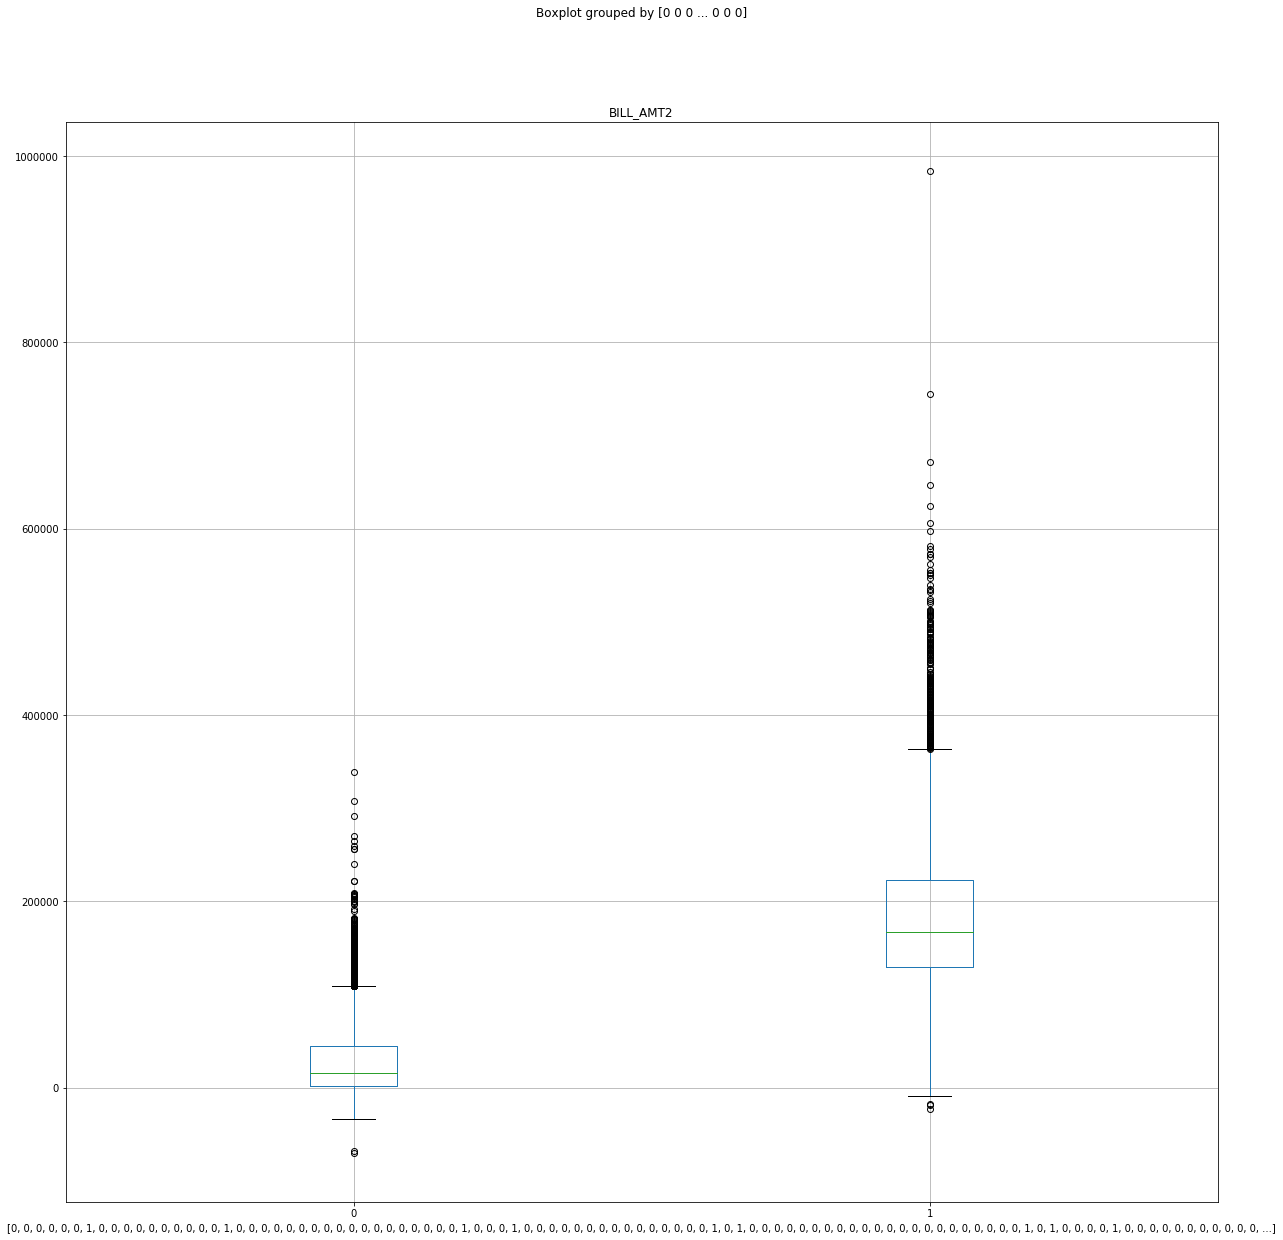

In [176]:
DATA.boxplot(column=['BILL_AMT2'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "BILL_AMT2" est significative , car dans le cluster0 sa valeur est entre 1et 50000 et dans le cluster1 , sa valeur est entre 100000 et 250000

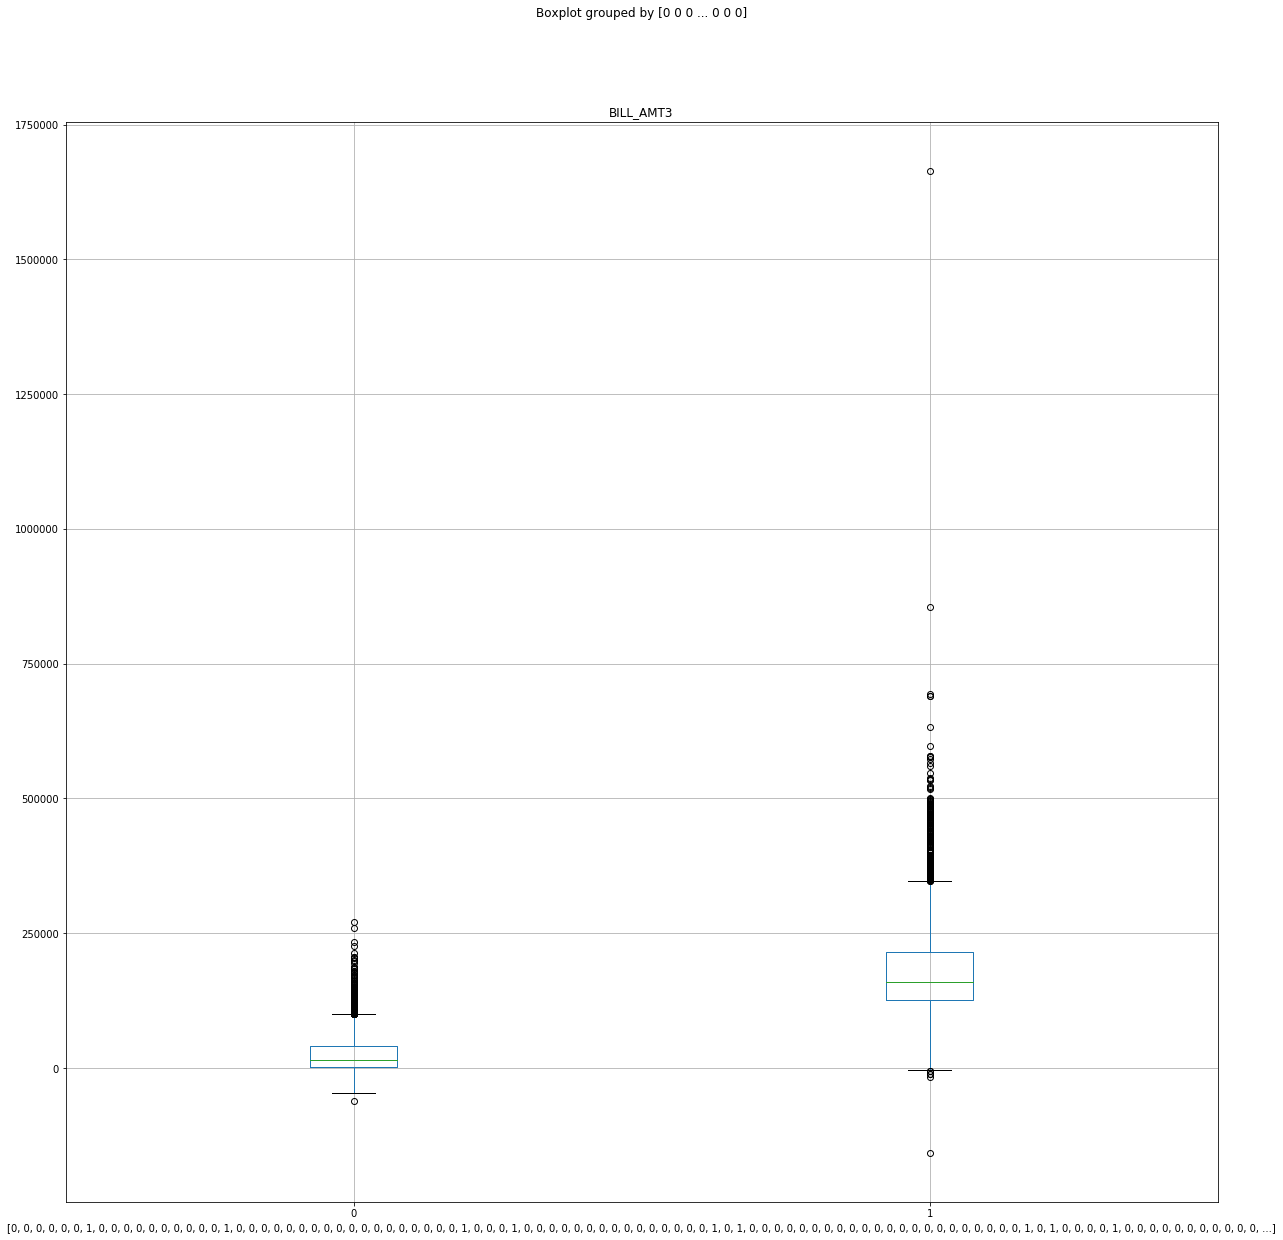

In [177]:
DATA.boxplot(column=['BILL_AMT3'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "	BILL_AMT3" est  significative , car dans le cluster0 sa valeur est entre 0 et 62000 et dans le cluster1 , sa valeur est entre 125000 et 200000

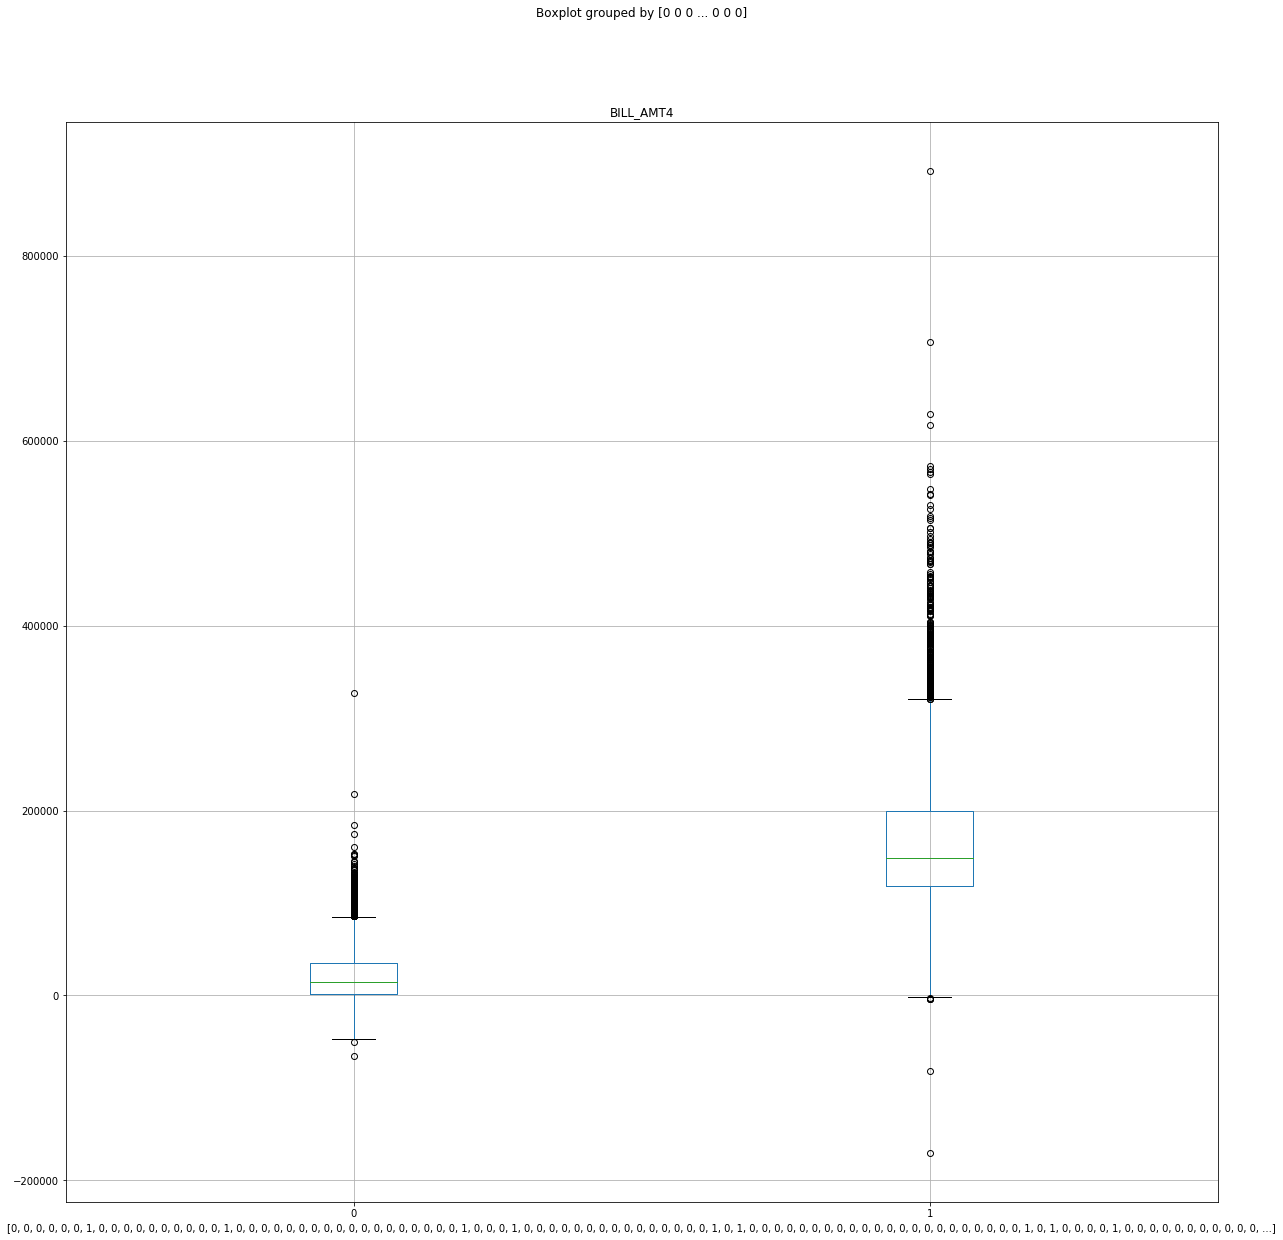

In [178]:
DATA.boxplot(column=['BILL_AMT4'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "BILL_AMT4" est significative , car dans le cluster0 sa valeur est entre 0 et 620000 et dans le cluster1 , sa valeur est entre 150000 et 200000

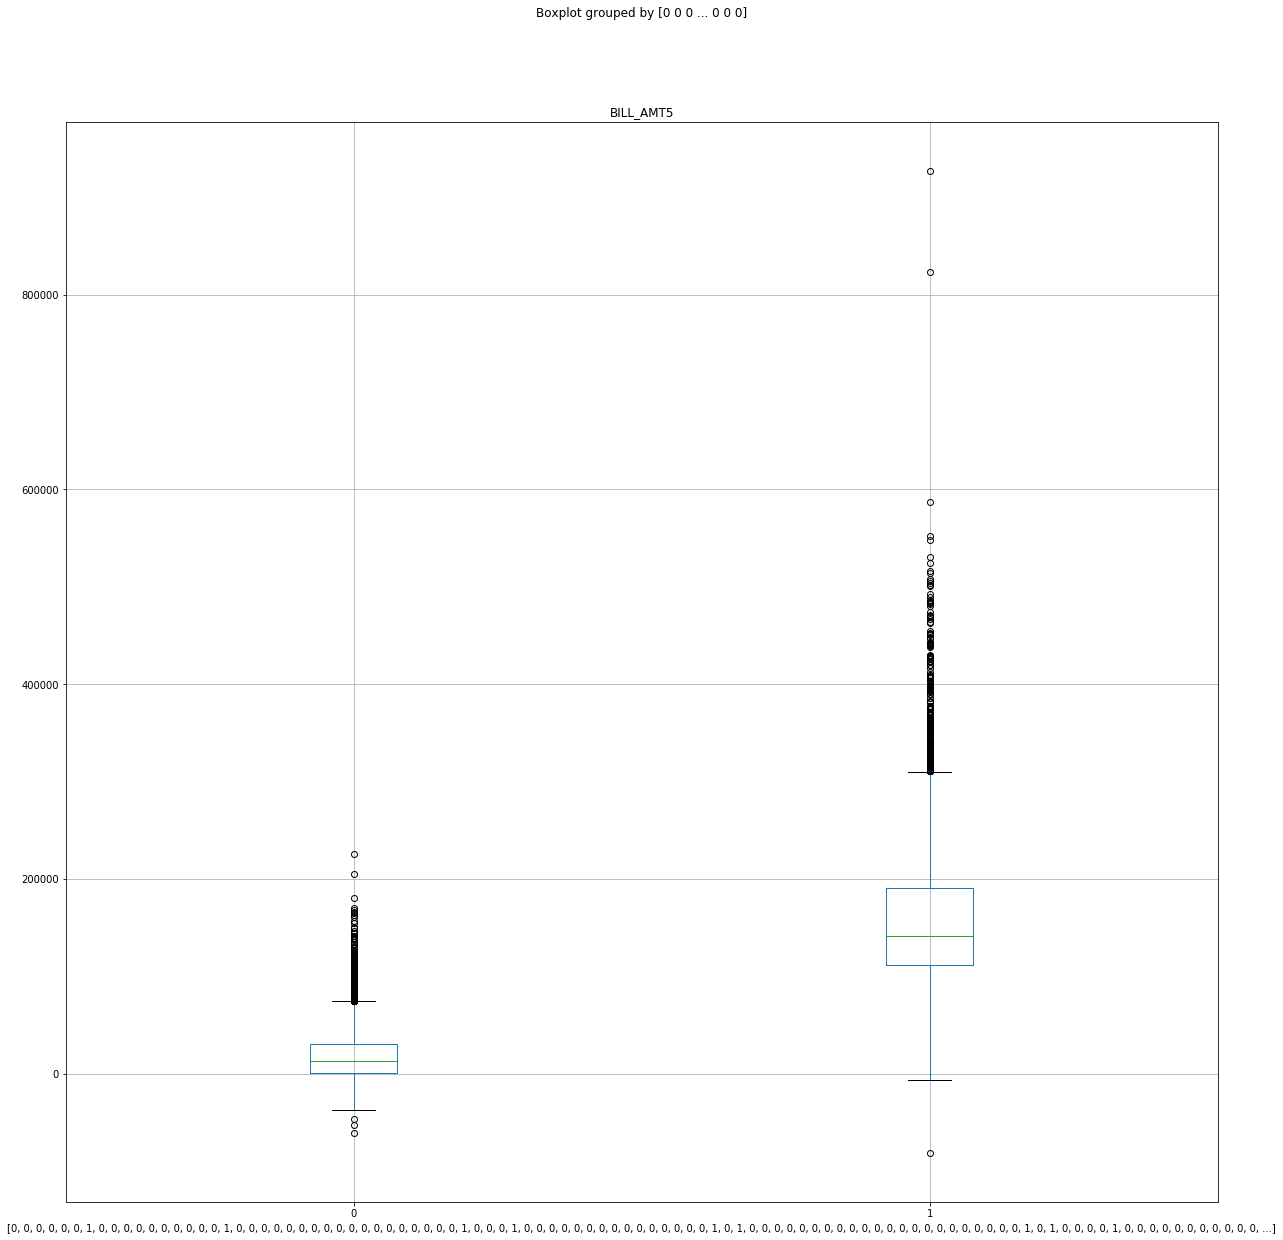

In [179]:
DATA.boxplot(column=['BILL_AMT5'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "BILL_AMT5" est significative , car dans le cluster0 sa valeur est entre 0 et 620000 et dans le cluster1 , sa valeur est entre 150000 et 195000

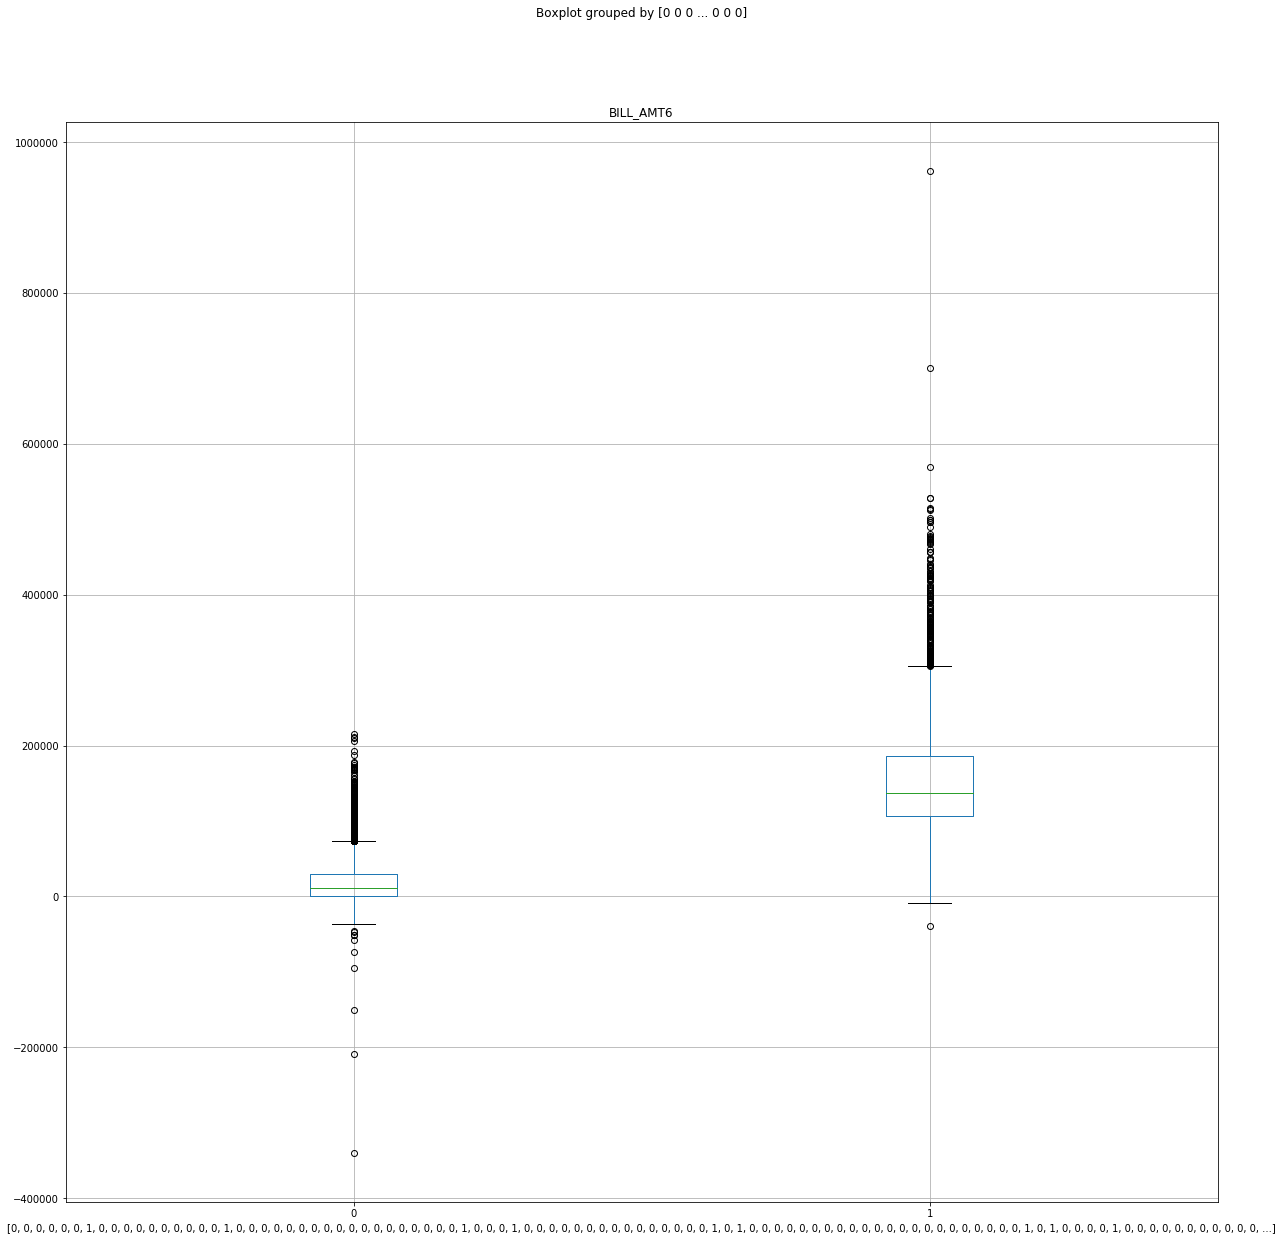

In [180]:
DATA.boxplot(column=['BILL_AMT6'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "BILL_AMT6" est moyennement significative , car dans le cluster0 sa valeur est entre 0 et 50000 et dans le cluster1 , sa valeur est entre 125000 et 195000

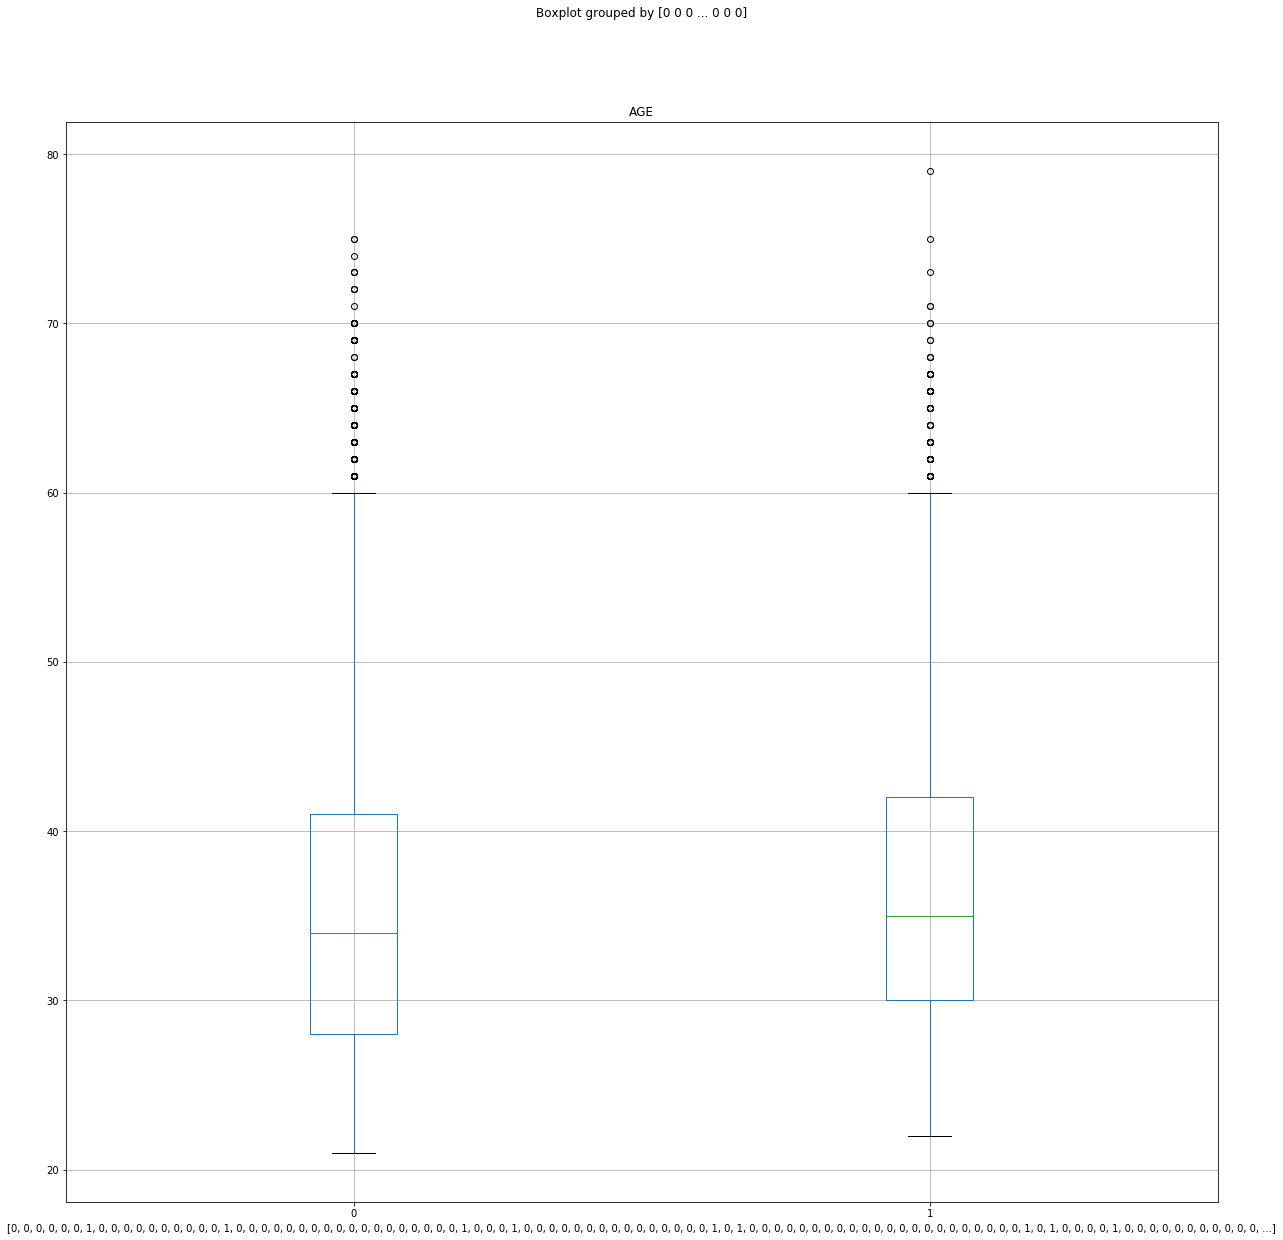

In [181]:
DATA.boxplot(column=['AGE'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "Age" n'est pas du tout significative car les deux clusters contiennent les memes valeurs

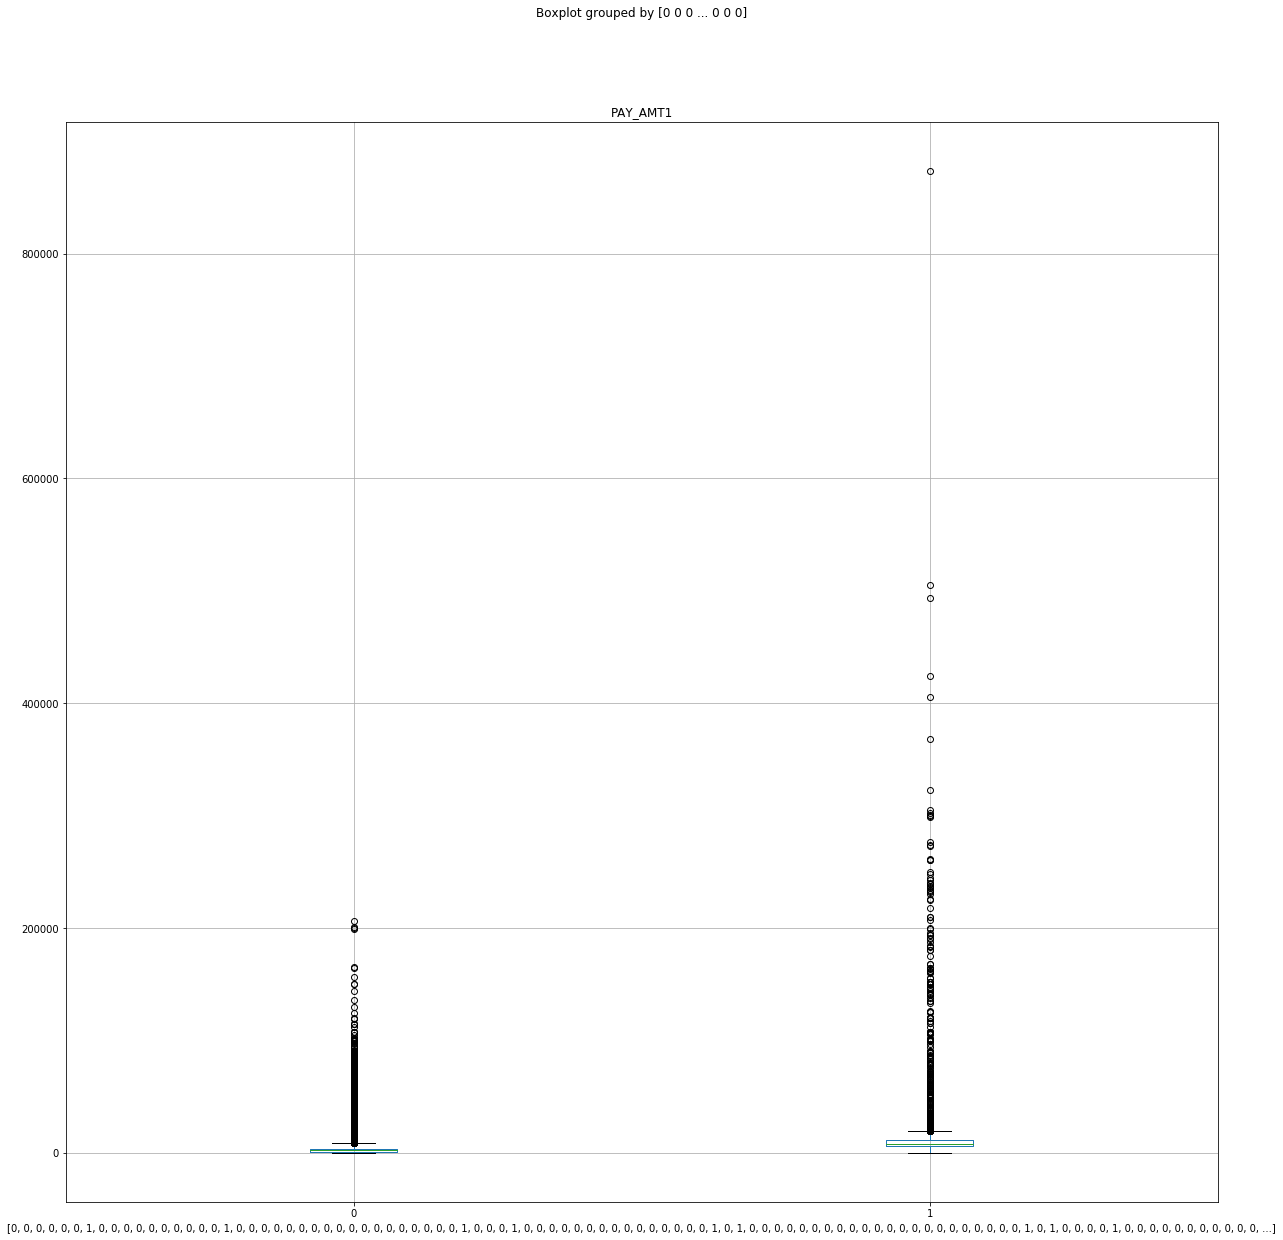

In [182]:
DATA.boxplot(column=['PAY_AMT1'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "PAY_AMT1" n'est pas du tout significative car les deux clusters contiennent les memes valeurs

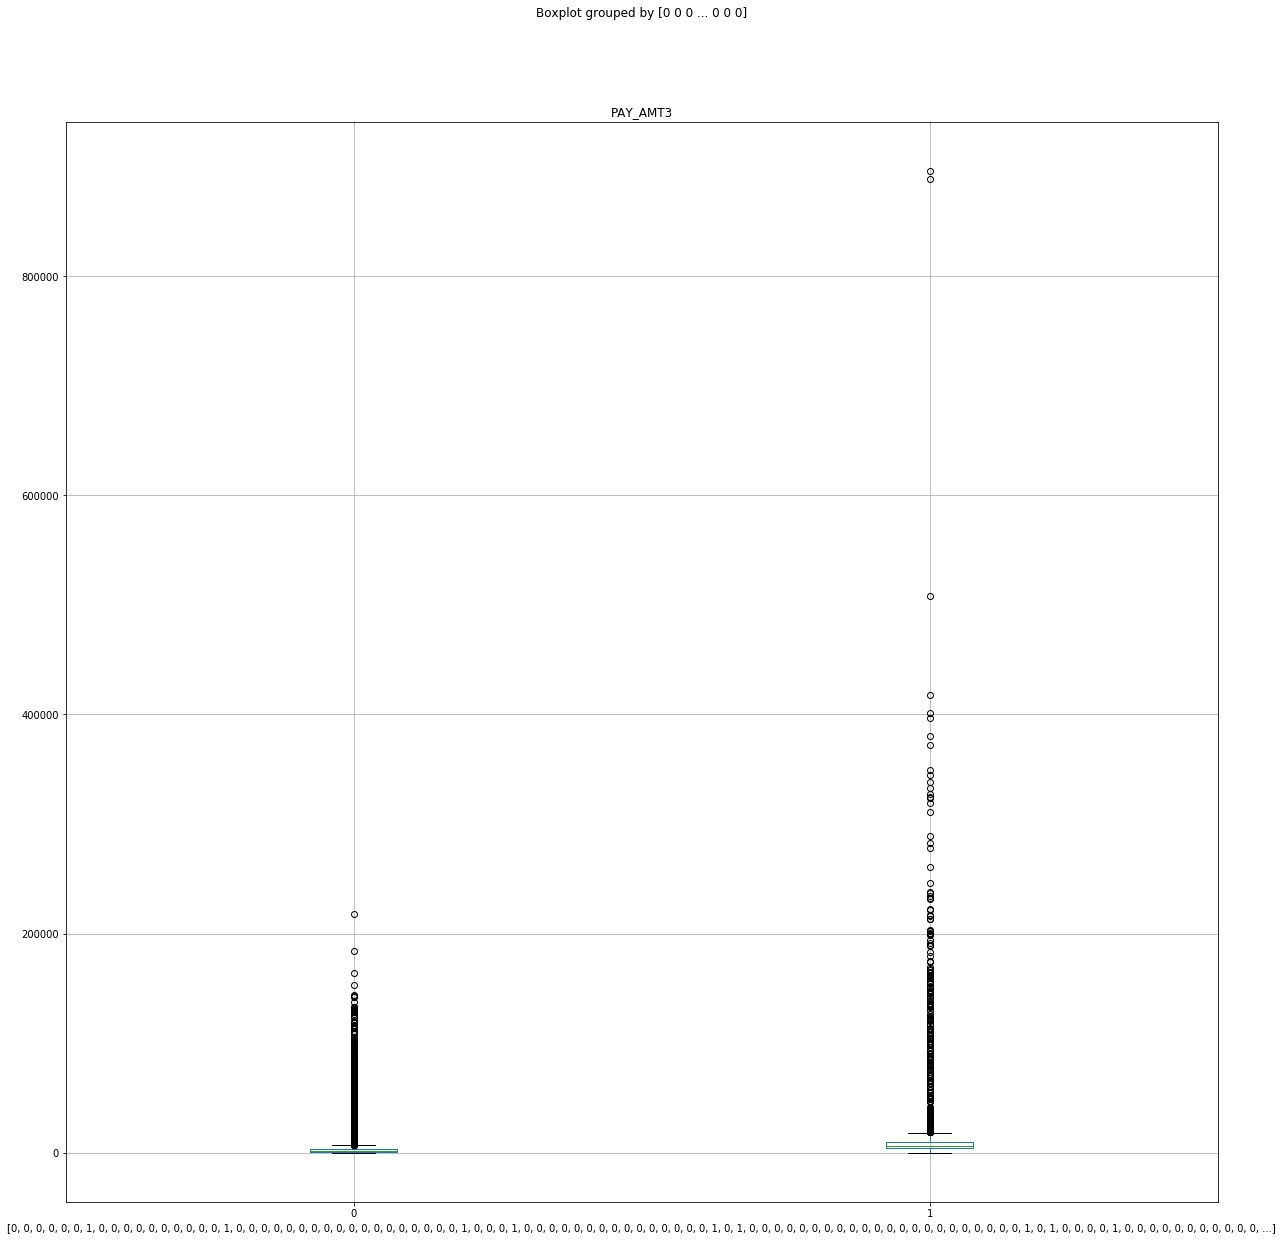

In [183]:
DATA.boxplot(column=['PAY_AMT3'],by=kmeans.labels_,figsize=(20,20));

- Interprétation :
  - la variable "PAY_AMT3" n'est pas du tout significative car les deux clusters contiennent les memes valeurs

##### Conclusion :
  - Dans Ce jeux de données , seulement les variables "BILL_AMT1 "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5",BILL_AMT6" sont significatives et elles sont plus élevées au niveau du cluster1 que le cluster0

### CAH :

In [85]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#générer la matrice des distances 
Z = linkage(Data_quanti,method='ward',metric='euclidean')


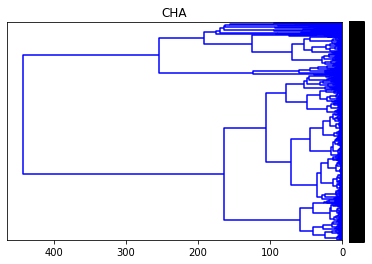

In [86]:
#affichage du dendrogramme 
plt.title("CHA") 
dendrogram(Z,labels=data_final.index,orientation='left',color_threshold=0) 
plt.show()

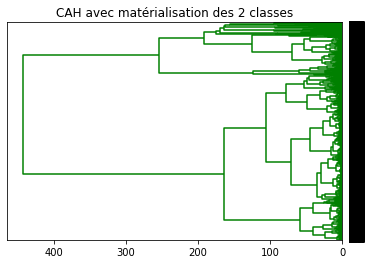

In [87]:
# matérialisation des deux classes (hauteur t = 500) 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=data_final.index,orientation='left',color_threshold=500) 
plt.show()

In [88]:
#découpage à la hauteur t = 400==> identifiants de 2 groupes obtenus 
groupes_cah = fcluster(Z,t=400,criterion='distance') 
print(groupes_cah)

[1 1 1 ... 1 2 1]


In [90]:
#correspondance les vrais labels avec les groupes de la CAH 
pd.crosstab(cible,groupes_cah)

col_0,1,2
default payment next month,,
0,17221,5775
1,5233,1372


In [92]:
from sklearn import metrics
metrics.adjusted_rand_score(cible,groupes_cah)

-0.017808884079127865

### Interprétation:
- le score du tableau croisé est trés faible, Donc On ne va pas  pouvoir l'utiliser pour  interpréter la variable Cible "RESULT" avec les clusters

### DBSCAN

In [77]:
from sklearn.cluster import DBSCAN
# cluster the data into two clusters
db_default = DBSCAN(eps = 3, min_samples = 2).fit(data_final) 
labels = db_default.labels_ 

In [79]:
#correspondance les vrais labels avec les groupes de la CAH 
pd.crosstab(cible,labels)


col_0,-1,0,1,2,3,4,5,6,7,8,...,492,493,494,495,496,497,498,499,500,501
default payment next month,,,,,,,,,,,,,,,,,,,,,
0,2120,3,15370,3,7,296,37,42,18,1,...,0,2,2,2,2,2,2,2,2,2
1,757,2,2117,0,0,82,9,4,14,1,...,3,0,0,0,0,1,0,0,0,0


##### Interprétation :
_  L'algorithme DBSCAN, nous a donné 114 clusters. Or ,Dans notre cas, on besoin juste de  2 clusters, donc on va pas travailler avec cet algo 
 Dans ce cas, on va utiliser KMEANS , qui est le plus performant

#### Application du KMEANS ET du KNN en utilisant les trois principales composantes:

In [93]:
FinalData = data_final[['university', 'high school', 'other_education', 'single',
       'other_mariage', 'PAY_01', 'PAY_02', 'PAY_03', 'PAY_04', 'PAY_05',
       'PAY_06', 'PAY_07', 'PAY_08', 'PAY_09', 'PAY_10', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8',
       'PAY_2_9', 'PAY_2_10', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_3_9', 'PAY_3_10',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_4_9', 'PAY_4_10', 'PAY_5_1', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_5_9', 'PAY_6_1', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'PAY_6_9','SEX']]

In [94]:
FinalData.head()

,university,high school,other_education,single,other_mariage,PAY_01,PAY_02,PAY_03,PAY_04,PAY_05,...,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9,SEX
0,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,-0.484790,-0.979832,-0.375736,3.19570,-0.10454,...,-0.486968,-1.08853,-0.320411,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,0.811083
1,1.053916,-0.443919,-0.064596,0.934222,-0.104209,2.062747,-0.979832,-0.375736,-0.31292,-0.10454,...,-0.486968,-1.08853,3.120988,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,0.811083
2,1.053916,-0.443919,-0.064596,0.934222,-0.104209,-0.484790,1.020583,-0.375736,-0.31292,-0.10454,...,-0.486968,0.91867,-0.320411,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,0.811083
3,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,-0.484790,1.020583,-0.375736,-0.31292,-0.10454,...,-0.486968,0.91867,-0.320411,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,0.811083
4,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,2.062747,-0.979832,-0.375736,-0.31292,-0.10454,...,-0.486968,0.91867,-0.320411,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,-1.232920


In [106]:
FinalData = pd.concat([FinalData,principalDf],axis=1)

In [107]:
FinalData.head()

,university,high school,other_education,single,other_mariage,PAY_01,PAY_02,PAY_03,PAY_04,PAY_05,...,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9,SEX,principal component 1,principal component 2
0,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,-0.484790,-0.979832,-0.375736,3.19570,-0.10454,...,-0.320411,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,0.811083,-1.784432,-0.258536
1,1.053916,-0.443919,-0.064596,0.934222,-0.104209,2.062747,-0.979832,-0.375736,-0.31292,-0.10454,...,3.120988,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,0.811083,-1.689450,-0.171719
2,1.053916,-0.443919,-0.064596,0.934222,-0.104209,-0.484790,1.020583,-0.375736,-0.31292,-0.10454,...,-0.320411,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,0.811083,-1.135408,-0.179466
3,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,-0.484790,1.020583,-0.375736,-0.31292,-0.10454,...,-0.320411,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,0.811083,-0.386601,-0.446067
4,1.053916,-0.443919,-0.064596,-1.070410,-0.104209,2.062747,-0.979832,-0.375736,-0.31292,-0.10454,...,-0.320411,-0.078871,-0.04072,-0.020961,-0.025343,-0.039451,-0.00822,-1.232920,-0.723406,0.929745


In [108]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

res=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(FinalData)
    res.append(kmeans.inertia_)

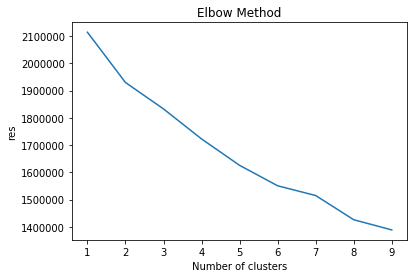

In [109]:
plt.plot(range(1, 10), res)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("res")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(FinalData)

In [111]:
pd.crosstab(cible, kmeans.labels_)

col_0,0,1,2,3,4,5,6,7,8
default payment next month,,,,,,,,,
0,12817,5776,1208,2904,3,8,266,9,5
1,2693,1160,1737,530,9,12,409,49,6


In [113]:
from sklearn import metrics
metrics.adjusted_rand_score(cible, kmeans.labels_)

0.0728801723151892

-  nous avons réaliser l'ACP sur les variables quantitatives seulement, nous avons eu 2 composantes principales, du coup, nous avons concatiné les résultats de l'ACP avec les autres variables qualitatives encodées puisque la méthode AFDM ne peut pas fonctionner sur les variables encodées.
- Puis nous avons utiliser la méthode Kmeans pour vérifier le clustring, qui est resté inchangé, et les résultats fournits sont les méme  avant et aprés la méthode utilisée Donc , nous allons maintenant appliquer les algorithmes de prédiction sur le dataframe final

### KNN 

In [114]:
# On a diviser les données en données d'entraînement et des données de test
from sklearn.model_selection import train_test_split
X = data_final
X_train, X_test, Y_train,Y_test = train_test_split(X,cible, random_state = 0)

In [115]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [116]:
# Choisir le meilleur k
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, Y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Erreur')

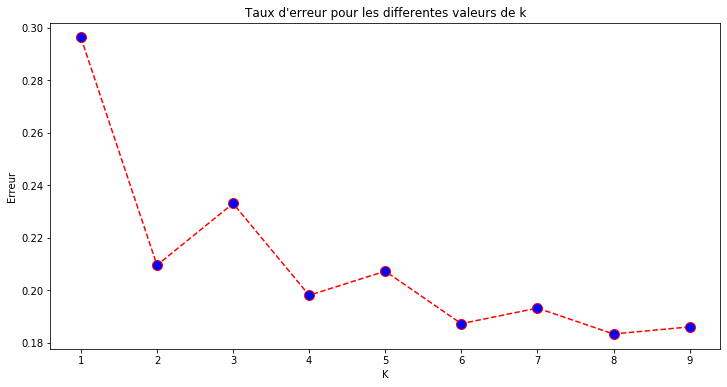

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

- le taux d'erreur est minimal lorsque le nombre de K est égal à 8

In [118]:
model_KNN = KNeighborsClassifier(n_neighbors=8)
model_KNN.fit(X_train, Y_train)
acc_KNN = model_KNN.score(X_test, Y_test)
print(acc_KNN)

0.8166463991352519


In [119]:
y_pred_knn =model_KNN.predict(X_test)


In [120]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model_KNN.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model_KNN.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.82


In [121]:
# on fait la prédiction sur notre data

In [122]:
predicted_knn = model_KNN.predict(data_final)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted_knn,cible)

0.8228438228438228

- le score est égal à 82% : élevé 

## Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, Y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [125]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc_model.score(X_train, Y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc_model.score(X_test, Y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.49


In [126]:
predicted_cart = dtc_model.predict(data_final)
accuracy_score(predicted_cart,cible)

0.5164352555656904

- CART nous a fournit le score de 50% , qui est inferieur à celui de KNN ==> Donc la methode KKN est la meilleure

## RANDOM FOREST

In [127]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, Y_train)
y_pred_rfc = rfc_model.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [128]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc_model.score(X_train, Y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc_model.score(X_test, Y_test)))

Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.73


In [129]:
predicted_rfc = rfc_model.predict(data_final)
accuracy_score(predicted_rfc,cible)

0.693523867436911

- Conclusion : selon le score , la methode KNN, est la meilleure , puis la méthode RANDOM FOREST puisque son score est égal à 69%, supérieur à celui de la méthode CART

## Courbe Roc
##### Interprétation de ces 3 méthodes graphiquement

In [130]:

%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [131]:
fpr1, tpr1, threshold1 = roc_curve(Y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(Y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(Y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

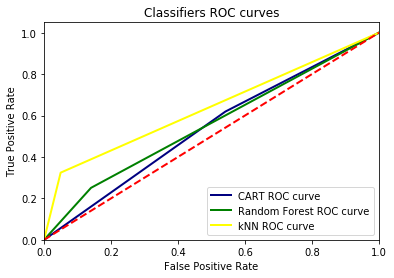

In [132]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve ')
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve')
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()